<h1>Tree Classification </h1>

We divide the predictor space — that is, the set of possible values for $ X_1,X_2,...,X_p$ — into J distinct and non-overlapping regions, $R_1,R_2,...,R_J$. 
    <p>
For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

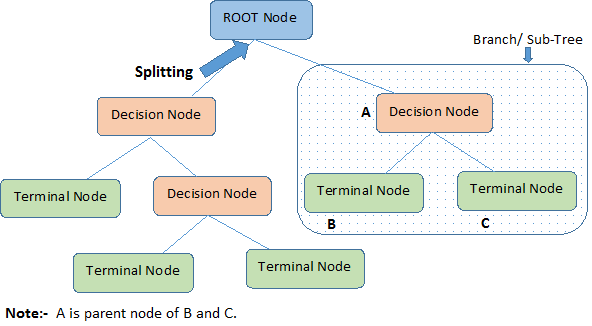

<h5>Types of Decision Trees</h5>
<p>Types of decision tree is based on the type of target variable we have. It can be of two types:
<p><b>Classification Tree:</b> Decision Tree which has categorical target variable then it called as Classification tree.
<p><b>Regression Tree:</b> Decision Tree has continuous target variable then it is called as Regression Tree.

<h1>Regression Tree</h1>


<p>

• In theory, the regions could have any shape. However, we choose to divide the predictor space into high-dimensional rectangles, or boxes, for simplicity and for ease of interpretation of the resulting predictive model. • The goal is to ﬁnd boxes  $R_1,R_2,...,R_J$ that minimize the RSS, given by

$$\displaystyle \sum _{j=1}^J \sum _{i\epsilon R_j}\left ( {Y}_{i}- \hat{Y_{R_j}} \right)^2$$

where $\hat{Y_{R_j}}$ is the mean response for the training observations within the $j^{th}$ box.

<p>
• Unfortunately, it is computationally infeasible to consider every possible partition of the feature space into J boxes. • For this reason, we take a top-down, greedy approach that is known as <b>recursive binary splitting</b>. • The approach is top-down because it begins at the top of the tree and then successively splits the predictor space; each split is indicated via two new branches further down on the tree. 
    <p>
        • It is <b>greedy</b> because at each step of the tree-building process, the <b>best split</b> is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.
<p>
• We ﬁrst select the predictor $X_j$ and the cutpoint s such that splitting the predictor space into the regions 
    {$X|X_j < s$} and {$X|X_j ≥ s$} leads to the greatest possible reduction in RSS. 
 <p>   
 • Next, we repeat the process, looking for the best predictor and best cutpoint in order to split the data further so as to minimize the RSS within each of the resulting regions. 
   <p>  
     • However, this time, instead of splitting the entire predictor space, we split one of the two previously identiﬁed regions. We now have three regions.
       <p>• Again, we look to split one of these three regions further, so as to minimize the RSS. The process continues until a stopping criterion is reached; for instance, we may continue until no region contains more than ﬁve observations.

<h5>Predictions</h5>
    <p>
• We predict the response for a given test observation using the mean of the training observations in the region to which that test observation belongs. 
        <p>



<h1>Classification Tree</h1>


<p>
    Just as in the regression setting, we use recursive binary splitting to grow a classiﬁcation tree. In the classiﬁcation setting, RSS cannot be used as a criterion for making the binary splits. Following are the methods used as alternative to RSS.
   <p><h3>Classiﬁcation error rate</h3>
      <p>  A natural alternative to RSS is the classiﬁcation error rate. this is simply the fraction of the training observations in that region that do not belong to the most common class:
$$E = 1 − max_k(\hat{p_{mk}})$$

<p>Here $\hat{p_{mk}}$ represents the proportion of training observations in the $m_{th}$ region that are from the $k_{th}$ class. However classiﬁcation error is not suﬃciently sensitive for tree-growing, and in practice two other measures are preferable.

<p><h3>Gini index and Deviance</h3>
<p>The Gini index is deﬁned by
    $$G=\displaystyle \sum _{k=1}^K \hat{p_{mk}}(1 − \hat{p_{mk}})$$
a measure of total variance across the K classes. The Gini index takes on a small value if all of the $\hat{p_{mk}}$’s are close to zero or one. For this reason the Gini index is referred to as a measure of node purity — a small value indicates that a node contains predominantly observations from a single class.

<p>Other Gini formula using weighted sum of square of probability (in this case we pick max)
$$G=\displaystyle  \sum _{k=1}^K \dfrac{N_{m}}{n}(\hat{p_{mk}})^2$$


   <p><h3>Cross-entropy</h3>
<p>  An alternative to the Gini index is cross-entropy, given by  
    $$D=\displaystyle -\sum _{k=1}^K \hat{p_{mk}} log(\hat{p_{mk}})$$
    
<h2>Predictions</h2>
    <p>
• We predict the response for a given test observation using the highest no. of the training observations in the region to which that test observation belongs. 
        <p>    

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from anytree import AnyNode, RenderTree

<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/ClassificationDS/ClassificationData.csv')   #Training Dataset
dfTrain.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
DistinctClasses=np.array(dfTrain['Y'].unique())
K=len(DistinctClasses)
print("Number of classes=",K)

Number of classes= 2


<h5> Visualize Data

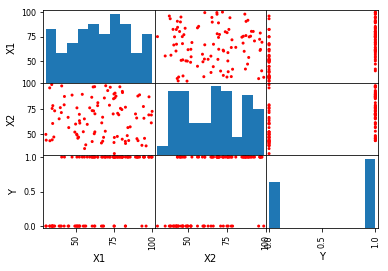

In [4]:
pd.plotting.scatter_matrix(dfTrain, alpha=1, diagonal='hist',color='r')
plt.show()

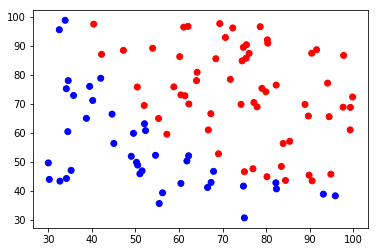

In [5]:
cmap = ListedColormap(['blue', 'red']) 
plt.scatter(dfTrain.loc[:,['X1']].values,dfTrain.loc[:,['X2']].values, c=dfTrain.loc[:,['Y']].values, cmap=cmap)
plt.show()

<h2>Extract Input Feature to <b>X </b>and Label to <b>Y</b></h2>
<h5>X=(X1 &amp; X2 in DS) and Y(Class in DS)   

In [6]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:2]
    df_Label=df.iloc[:,2:3]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [7]:
X,Y=extractFeatures(dfTrain)

<h2>Create Tree

In [8]:
def getGiniScore(X,Y,ri,ci):
    G=0
    S=X[ri,ci]
    Y0=Y[np.where(X[:,ci]<=S)]
    Y1=Y[np.where(X[:,ci]>S)]
    ep=0.00000000001
    
    for i in range(K):
        P=len(Y0[np.where(Y0==i)])/(len(Y0)+ep)
        Q=len(Y1[np.where(Y1==i)])/(len(Y1) +ep)
        G=G+(len(Y0)/len(Y))*P**2 +(len(Y1)/len(Y)) *Q**2

    return G

In [9]:
def getBestSplit(X,Y,ThresholdCount):
    ri=0
    ci=0  
    for i in range(K):
        if(len(Y[np.where(Y==i)])==len(Y)):
            ri=-1
            ci=-1 

    if(X.shape[0]<=ThresholdCount):
        ri=-1
        ci=-1   

    if(ri!=-1 and ci!=-1):
        G=np.zeros((X.shape))
        for ri in range(G.shape[0]):
            for ci in range(G.shape[1]):   
                G[ri,ci]=getGiniScore(X,Y,ri,ci)

        ri=np.unravel_index(np.argmax(G, axis=None), G.shape)[0]
        ci=np.unravel_index(np.argmax(G, axis=None), G.shape)[1]
    
    return ri,ci

In [10]:
def createTree(X, y,Level=1,Node=AnyNode(id="root",vPredictedClass=-1),ThresholdCount=1):
     
    ri,ci=getBestSplit(X,y,ThresholdCount)
  
    if( ri!=-1 and     ci!=-1):
        SplitFeature=ci
        SplitValue=X[ri,ci]

        #PlotTreeSplit(X,SplitFeature,SplitValue,Level)  #Plot While Training
        
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]     
       
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
       

        s0 = AnyNode(id="Level_"+str(Level)+"_Left("+"X"+str(SplitFeature)+"<"+str(round(SplitValue,1))+")", parent=Node,vLevel=Level,vSplitFeature=SplitFeature,vOp="<",vSplitValue=SplitValue,vSplitSign=-1,vPredictedClass=-1)
        s1 = AnyNode(id="Level_"+str(Level)+"_Right("+"X"+str(SplitFeature)+">"+str(round(SplitValue,1))+")", parent=Node,vLevel=Level,vSplitFeature=SplitFeature,vOp=">",vSplitValue=SplitValue,vSplitSign=1,vPredictedClass=-1)
        s0=createTree(X0,Y0,Level+1,s0,ThresholdCount=ThresholdCount)        
        s1=createTree(X1,Y1,Level+1,s1,ThresholdCount=ThresholdCount)

    else:
        if len(y[np.where(y==0)])<= len(y[np.where(y==1)]):
            Node.vPredictedClass=1
        else:
            Node.vPredictedClass=0
      

    return Node

In [11]:
Threshold=30

#Training
TrainedTree = createTree(X, Y,ThresholdCount=Threshold)

<h1> Prediction/Accuracy Evaluation

In [12]:
def predictTree(X,y,Node):
    if(len(Node.children)!=0):
        SplitFeature=Node.children[0].vSplitFeature
        SplitValue=Node.children[0].vSplitValue
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]             
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
        newX1,newY1=predictTree(X0,Y0,Node.children[0])
        newX2,newY2=predictTree(X1,Y1,Node.children[1])
        newX= np.concatenate((newX1,newX2),axis=0)
        newY=np.concatenate((newY1,newY2),axis=0)
    else:
        newX=X
        for i in range(len(y)):
            y[i]=Node.vPredictedClass
        newY=y
    return newX,newY

<h5>Accurracy on Training Data

In [13]:
def accurracy(Xy,NewXy):
    Xy=np.sort(Xy,axis=0)
    NewXy=np.sort(NewXy,axis=0)
    Y1=Xy[:,-1]
    Y2=NewXy[:,-1]
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

<h3>Predict using Tree Created

In [14]:
newX,newY=predictTree(X,Y,TrainedTree)
Xy=np.column_stack((X,Y))                #Merge dataset to sort order again 
newXy=np.column_stack((newX,newY)   )    #Compare requires sorting as Tree shuffled the data in leaf nodes
Accuracy=accurracy(Xy,newXy)
print("Traning  accuracy(",Accuracy,"%).")

Traning  accuracy( 98.0 %).


<h1>Plotting Hypothesis

In [15]:
def PlotTreeSplit(X,SplitFeature,SplitValue,Level): 
    x_min, x_max = X[:, 0].min() , X[:, 0].max() 
    y_min, y_max = X[:, 1].min() , X[:, 1].max()
    u = np.linspace(x_min, x_max, 2) 
    v = np.linspace(y_min, y_max, 2)      
    for i in range(len(v)): 
        if (SplitFeature==0):        
            u[i] = SplitValue
        else:
            v[i] = SplitValue
    plt.plot(u, v)
    plt.text(u[0],v[0],Level,rotation=90*SplitFeature )
    return


####################################################################
def PlotTree(X,y,Node):
    if(len(Node.children)!=0):
        SplitFeature=Node.children[0].vSplitFeature
        SplitValue=Node.children[0].vSplitValue
        Level=Node.children[0].vLevel
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]     
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
        PlotTreeSplit(X,SplitFeature,SplitValue,Level)
        PlotTree(X0,Y0,Node.children[0])
        PlotTree(X1,Y1,Node.children[1])
    else:
        plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1],marker="+")
        plt.scatter(X[np.where(y!=1),0],X[np.where(y!=1),1],marker="o")
    return

####################################################################
def PlotPoints(X,y):
    plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1],marker="+")
    plt.scatter(X[np.where(y!=1),0],X[np.where(y!=1),1],marker="o")
    return

####################################################################
def PrintTree(Tree):
    print(RenderTree(Tree))
    return


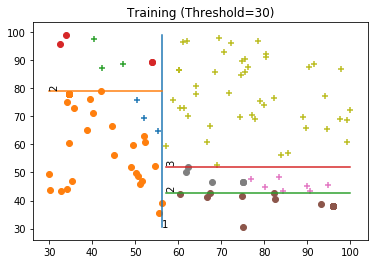

In [16]:
#%matplotlib notebook
plt.subplot(111)  
plt.title("Training (Threshold="+str(Threshold)+")")   
PlotTree(X,Y,TrainedTree)



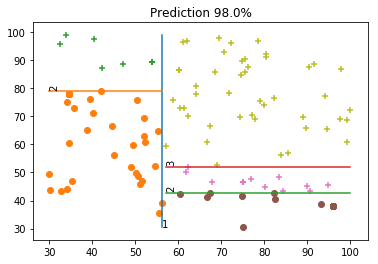

In [17]:
plt.subplot(111) 
plt.title("Prediction "+str(Accuracy)+"%")     
PlotTree(newX,newY,TrainedTree)
plt.show()

<h1>
   Pruning a tree


<p>• The process described above may produce good predictions on the training set, but is likely to overﬁt the data, leading to poor test set performance.
<p>• A smaller tree with fewer splits (that is, fewer regions $R_1,...,R_J$) might lead to lower variance and better interpretation at the cost of a little bias.
<p>• One possible alternative to the process described above is to grow the tree only so long as the decrease in the RSS due to each split exceeds some (high) threshold.
<p>• A better strategy is to grow a very large tree, and then prune it back in order to obtain a subtree
<p>• Cost complexity pruning — also known as weakest link pruning — is used to do this

In [18]:
def pruneTree(X,y,Node,ThresholdCount):
    if(len(Node.children)!=0):
        SplitFeature=Node.children[0].vSplitFeature
        SplitValue=Node.children[0].vSplitValue
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]             
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
        if (X0.shape[0]<ThresholdCount or X1.shape[0]<ThresholdCount):
            Node.children=[]
            PredictedClass=0
            PredictedClassLen=0
            for i in range(int(y.max()+1)):
                if (len(y[np.where(y==i)])>PredictedClassLen):
                    PredictedClass=i
                    PredictedClassLen=len(y[np.where(y==i)])
            Node.vPredictedClass=PredictedClass
        else:            
            pruneTree(X0,Y0,Node.children[0],ThresholdCount)
            pruneTree(X1,Y1,Node.children[1],ThresholdCount)
                
    return Node

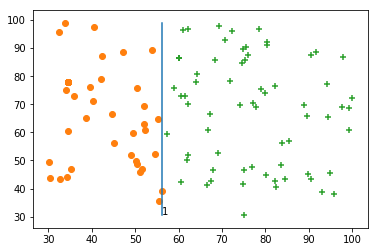

In [19]:
PrunedTree = pruneTree(X, Y, TrainedTree,ThresholdCount=Threshold)
newX,newY=predictTree(X,Y,PrunedTree)
PlotTree(newX,newY,PrunedTree)
plt.show()

In [20]:
#Print Tree
PrintTree(PrunedTree)

AnyNode(id='root', vPredictedClass=-1)
├── AnyNode(id='Level_1_Left(X0<56.3)', vLevel=1, vOp='<', vPredictedClass=0, vSplitFeature=0, vSplitSign=-1, vSplitValue=56.253817497116245)
└── AnyNode(id='Level_1_Right(X0>56.3)', vLevel=1, vOp='>', vPredictedClass=1, vSplitFeature=0, vSplitSign=1, vSplitValue=56.253817497116245)
